# Bayesian inference of average causal effect with instrumental variables

In [45]:
import stan
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

We will implement inference of average causal effect using the finite-response treatment given by Pearl, Causality 2009.

 <img src="Figures/ace.jpg" style="width:700px"> 

## Warm-up: using PyStan & beta-binomial model

Below is a minimal working example for using PyStan for inference on a coin flip with a beta-distributed prior.

In [46]:
x = np.random.choice([0,1], p=[0.2,0.8], size=1000) # data

Declare the model using the Stan probabilistic programming language

In [24]:
coin_flip = """
data {
  int<lower=0> N;
  int<lower=0, upper=1> x[N];   
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  theta ~ beta(0.5, 0.5);
  x ~ bernoulli(theta);
}
"""

Compile the model

In [25]:
coin_data = {"x": x, "N":len(x)}

In [26]:
posterior = stan.build(coin_flip, data=coin_data, random_seed=1)

Building... This may take some time.
Done.


Perform inference

In [27]:
fit = posterior.sample(num_chains=4, num_samples=1000)

Sampling...
Messages received during sampling:
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 6e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
  Adjust your expectations accordingly!
    0 [>---------------------------]  1 sec
Done.


Compare to theory

In [28]:
df = fit.to_frame()

In [37]:
a = 0.5 + np.sum(x)
b = 0.5 + len(x) - np.sum(x)
theta_sp = np.linspace(0.79, 0.86)
posterior_theory = beta.pdf(theta_sp, a, b)

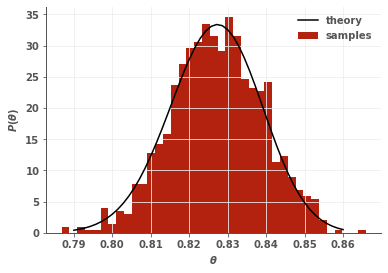

In [44]:
fig, ax = plt.subplots()
df['theta'].hist(ax=ax, bins='auto', label='samples', density=True)
ax.plot(theta_sp, posterior_theory, '-k', label='theory')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$P(\theta)$')
ax.legend()

As expected

## Finite-response treatment of instrumental variable model